To showcase the ``AAclustPlot().correlation()`` method, we create an example dataset and obtained a DataFrame with pairwise correlations (``df_corr``) using the ``AAclust().correlation()`` method:

In [25]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False
# Obtain example scale dataset 
df_scales = aa.load_scales(unclassified_out=True).T.sample(50).T
df_cat = aa.load_scales(name="scales_cat")
dict_scale_name = dict(zip(df_cat["scale_id"], df_cat["subcategory"]))
names = [dict_scale_name[s] for s in list(df_scales)]
X = df_scales.T
# Fit AAclust model and retrieve labels, cluster names, and df_corr
aac = aa.AAclust()
labels = aac.fit(X, n_clusters=8).labels_
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels)

The pair-wise Pearson correlation can now be visualized using the ``AAclustPlot().correlation()`` method. Provide the labels sorted as in ``df_corr``.

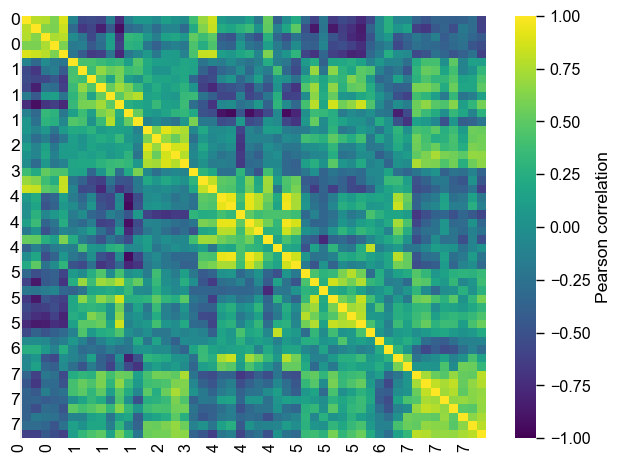

In [26]:
aac_plot = aa.AAclustPlot()
aa.plot_settings(font_scale=0.7, weight_bold=False, no_ticks=True)
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted)
plt.show()

Gray bars indicate the clusters. To change their position or provide multiple bars, use the ``bar_position`` parameter and adjust their width and spacing by using ``bar_width_x``, ``bar_width_y``, ``bar_spacing_x``, and ``bar_spacing_y``

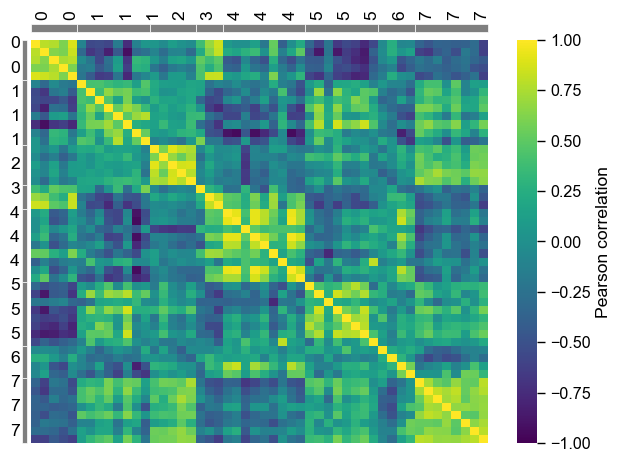

In [27]:
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted, bar_position=["left", "top"],
                     bar_width_x=1, bar_width_y=0.5, bar_spacing_x=1, bar_spacing_y=0.5)
plt.show()

To obtain the correlation between each scale (y-axis) and the medoids (x-axis), we obtain the medoids using the ``AAclust().comp_medoids()`` and ``AAclust().comp_correlation()`` methods. 

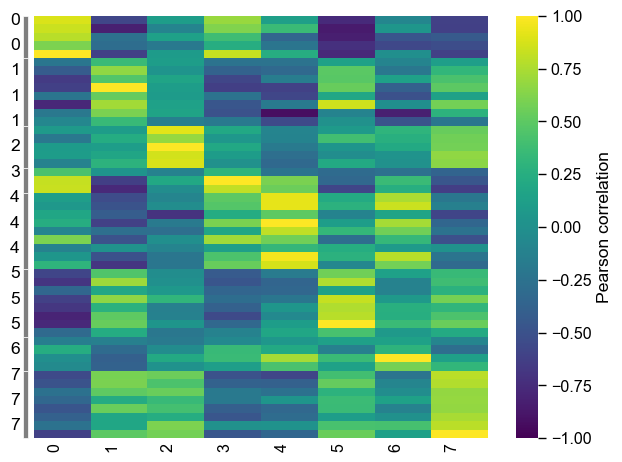

In [28]:
X_ref, labels_ref = aac.comp_medoids(X, labels=labels)
# Creat correlation DataFrane between scales and medoids
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref)
# Plot correlation
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted)
plt.tight_layout()
plt.show()

We can re-clustered the x-axis values be setting ``cluster_x=True``. The ``scipy.cluster.hierarchy.linkage`` method is internally used, for which the linkage method can be selected by the ``method`` parameter (default=``average``):

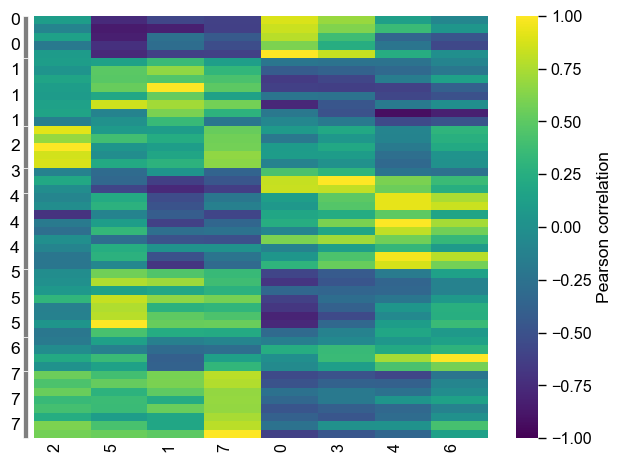

In [29]:
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted, cluster_x=True, method="ward")
plt.tight_layout()
plt.show()

To show the names of scales (y-axis) and cluster (x-axis), provide them to the ``AAclust().comp_correlation()`` method. The cluster labels (``labels_ref``) must be given to the ``AAclustPlot().correlation()`` method. The ``xtick_label_rotation`` parameter can be used to rotate the x-ticks:

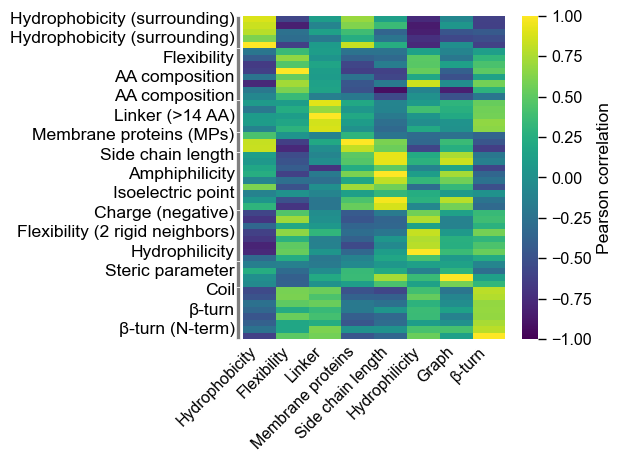

In [30]:
# Creat correlation DataFrane between scales and medoids
cluster_names = aac.name_clusters(X, labels=labels, names=names)
dict_cluster = dict(zip(labels, cluster_names))
names_ref = [dict_cluster[i] for i in labels_ref]
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref, names=names, names_ref=names_ref)
# Plot correlation
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted, labels_ref=labels_ref, xtick_label_rotation=45)
plt.tight_layout()
plt.show()

If the columns of ``df_corr`` contain the cluster labels, ``labels_ref`` does not need to be provided. The clusters can be colored using the ``bar_colors`` parameter. 

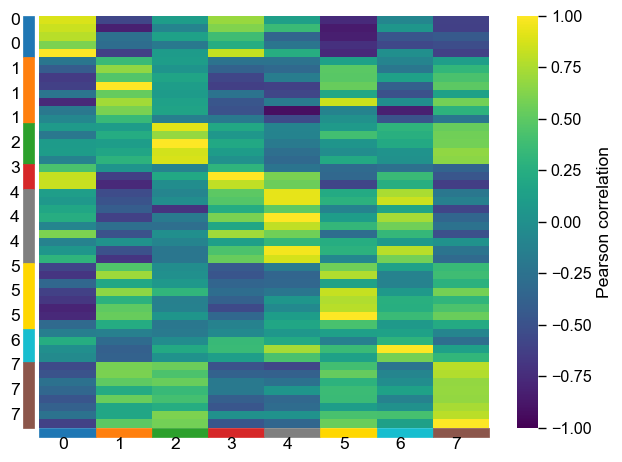

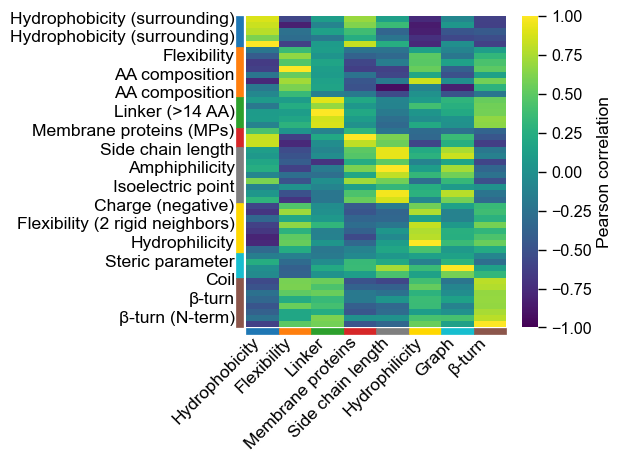

In [36]:
# Plot correlation without cluster names
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref)
n_clusters = len(set(labels_sorted))
colors = aa.plot_get_clist(n_colors=n_clusters)
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted, xtick_label_rotation=0,
                     bar_colors=colors, bar_position=["left", "bottom"], bar_width_x=1, bar_width_y=0.2)
plt.tight_layout()
plt.show()
# Plot correlation with cluster names
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref, 
                                              names=names, names_ref=names_ref)
n_clusters = len(set(labels_sorted))
colors = aa.plot_get_clist(n_colors=n_clusters)
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted, xtick_label_rotation=45, labels_ref=labels_ref,
                     bar_colors=colors, bar_position=["left", "bottom"], bar_width_x=1, bar_width_y=0.2)
plt.tight_layout()
plt.show()

While ``vmin``, ``vmax``, anx ``cmap`` can be directly adjusted, further keyword arguments for the ``sns.heatmap()`` function can be provided by the ``kwargs_heatmap`` argument: 

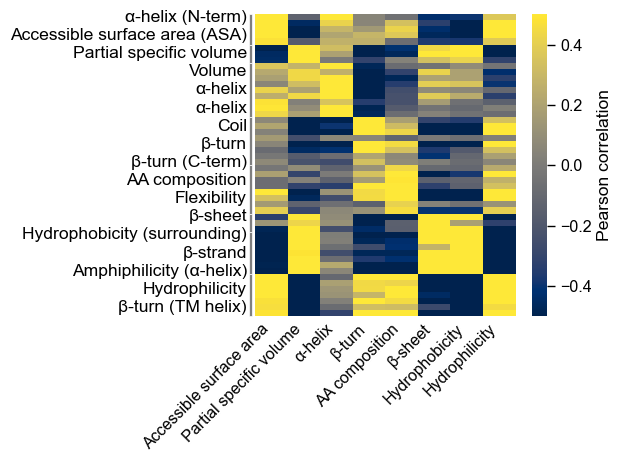

In [19]:
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref, names=names, names_ref=names_ref)
# Plot correlation
aac_plot.correlation(df_corr=df_corr, labels=labels_sorted, labels_ref=labels_ref, xtick_label_rotation=45,
                     vmin=-0.5, vmax=0.5, cmap="cividis", kwargs_heatmap=dict(linecolor="black"))
plt.tight_layout()
plt.show()